# *** Challenge Set 7***

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#import ml_insights as mli

# To Plot matplotlib figures inline on the notebook
%matplotlib inline

#from sklearn.model_selection import train_test_split
from sklearn.cross_validation import train_test_split

from sklearn.linear_model import LinearRegression, Lasso, LassoCV
from collections import OrderedDict

/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:

datafile = "house-votes-84.data.txt"
df=pd.read_csv(datafile)

In [3]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435 entries, 0 to 434
Data columns (total 17 columns):
party    435 non-null object
hi       435 non-null object
wp       435 non-null object
ad       435 non-null object
ph       435 non-null object
el       435 non-null object
re       435 non-null object
an       435 non-null object
ai       435 non-null object
mx       435 non-null object
im       435 non-null object
sy       435 non-null object
ed       435 non-null object
su       435 non-null object
cr       435 non-null object
du       435 non-null object
ex       435 non-null object
dtypes: object(17)
memory usage: 57.9+ KB


,party,hi,wp,ad,ph,el,re,an,ai,mx,im,sy,ed,su,cr,du,ex
0,republican,n,y,n,y,y,y,n,n,n,y,?,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?
2,democrat,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y


# ***Challenge 1***

In [4]:
df3 = pd.DataFrame(columns=df.columns)
df3['party'] = df['party']
for i in range(1,len(df.columns)):   
    prob = df[df.columns[i]][df[df.columns[i]]!='?'].map({'y':1, 'n':0}).mean()
    df3[df.columns[i]] = df[df.columns[i]].map({'y':1, 'n':0, '?':prob})


df3.head()

,party,hi,wp,ad,ph,el,re,an,ai,mx,im,sy,ed,su,cr,du,ex
0,republican,0.00000,1.0,0.0,1.000000,1.000000,1.0,0.0,0.0,0.0,1.0,0.362319,1.000000,1.0,1.0,0.0,1.000000
1,republican,0.00000,1.0,0.0,1.000000,1.000000,1.0,0.0,0.0,0.0,0.0,0.000000,1.000000,1.0,1.0,0.0,0.812689
2,democrat,0.44208,1.0,1.0,0.417453,1.000000,1.0,0.0,0.0,0.0,0.0,1.000000,0.000000,1.0,1.0,0.0,0.000000
3,democrat,0.00000,1.0,1.0,0.000000,0.504762,1.0,0.0,0.0,0.0,0.0,1.000000,0.000000,1.0,0.0,0.0,1.000000
4,democrat,1.00000,1.0,1.0,0.000000,1.000000,1.0,0.0,0.0,0.0,0.0,1.000000,0.423267,1.0,1.0,1.0,1.000000


# ***Challenge 2***

In [9]:
X = df3[df.columns[1:]]
y = df3['party']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=4444)


# ***Challenge 3***

In [10]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [11]:
bestval = -1
for i in range(1,21):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    val = accuracy_score(y_test, knn.predict(X_test))
    if val > bestval:
        bestval = val
        besti = i
    
print('Best accuracy of {} achieved with {} neighbors'.format(bestval, i))

Best accuracy of 0.9312977099236641 achieved with 20 neighbors


# ***Challenge 4***

In [25]:
from sklearn.linear_model import LogisticRegression

In [13]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
lracc = accuracy_score(y_test, lr.predict(X_test))
lracc

0.93893129770992367

# ***Challenge 5***

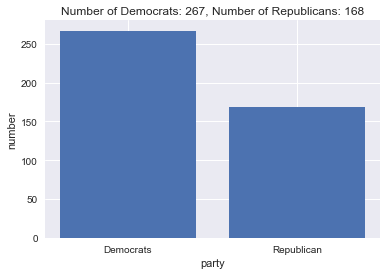

Using KNN=20, accuracy of predicting all Democrats: 0.5877862595419847, and all Republicans: 0.4122137404580153


In [14]:
plt.xlabel('party')
plt.ylabel('number')
plt.xticks(range(2), ('Democrats', 'Republican'))
plt.bar([0,1], [y[y=='democrat'].count(), y[y=='republican'].count()] )


plt.title("Number of Democrats: {}, Number of Republicans: {}".format(
                y[y=='democrat'].count(), y[y=='republican'].count()))
plt.show()

def alldem(X):
    return len(X)*['democrat']

def allrep(X):
    return len(X)*['republican']


alldacc = accuracy_score(y_test, alldem(X_test)) 
allracc = accuracy_score(y_test, allrep(X_test))
print('Using KNN=20, accuracy of predicting all Democrats: {}, and all Republicans: {}'.format(
                alldacc, allracc))

# ***Challenge 6***

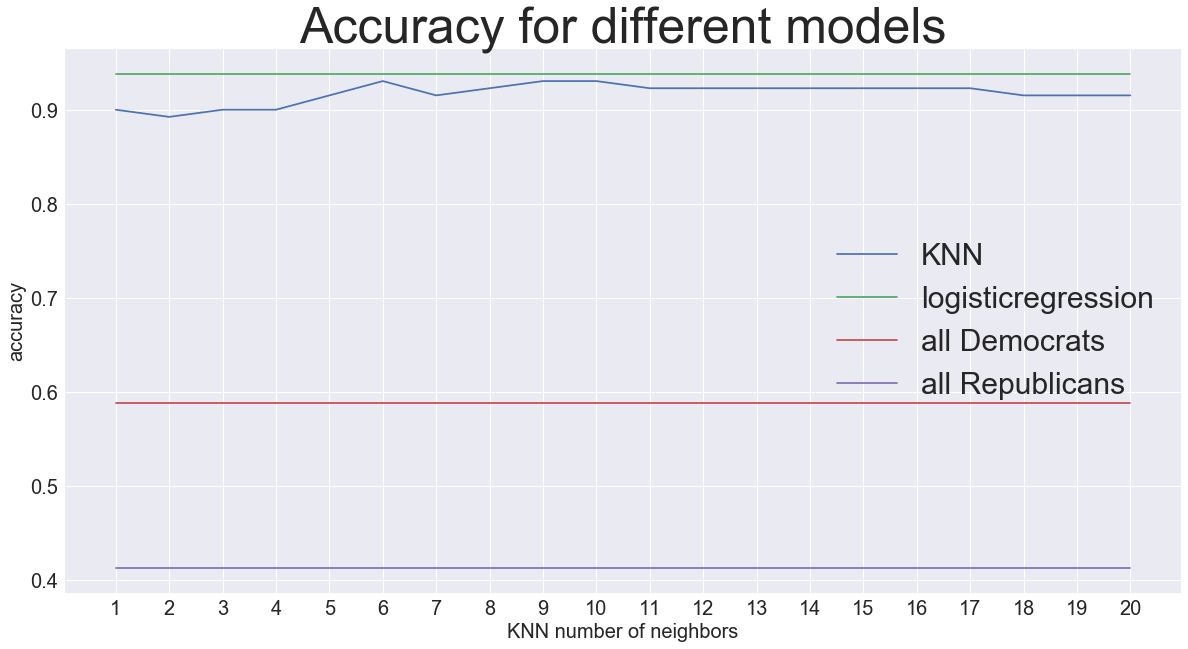

In [15]:
val = []
for i in range(1,21):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    val.append(accuracy_score(y_test, knn.predict(X_test)))

# plt.plot(range(1,21), val)
# plt.plot(range(1,21), 20*[lracc])
# plt.plot(range(1,21), 20*[alldacc])
# plt.plot(range(1,21), 20*[allracc])

plt.figure(figsize=(20,10))
plt.xlabel("KNN number of neighbors", fontsize=20)
plt.ylabel("accuracy", fontsize=20)
plt.xticks(range(1,21),fontsize=20)
plt.yticks(fontsize=20)
plt.title("Accuracy for different models", fontsize=50)
KNN, = plt.plot(range(1,21), val, label='KNN')
LR, = plt.plot(range(1,21), 20*[lracc], label='logisticregression')
allDem, = plt.plot(range(1,21), 20*[alldacc], label='all Democrats')
allRep, = plt.plot(range(1,21), 20*[allracc], label='all Republicans')

plt.legend(handles=[KNN, LR, allDem, allRep], fontsize=30);

# ***Challenge 7***

In [16]:
from sklearn.learning_curve import learning_curve
m, train_err, test_err = learning_curve(LogisticRegression(), X, y)

/anaconda/lib/python3.6/site-packages/sklearn/learning_curve.py:23: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the functions are moved. This module will be removed in 0.20
  DeprecationWarning)


In [17]:
train_cv_err = np.mean(train_err, axis=1)
test_cv_err = np.mean(test_err, axis=1)

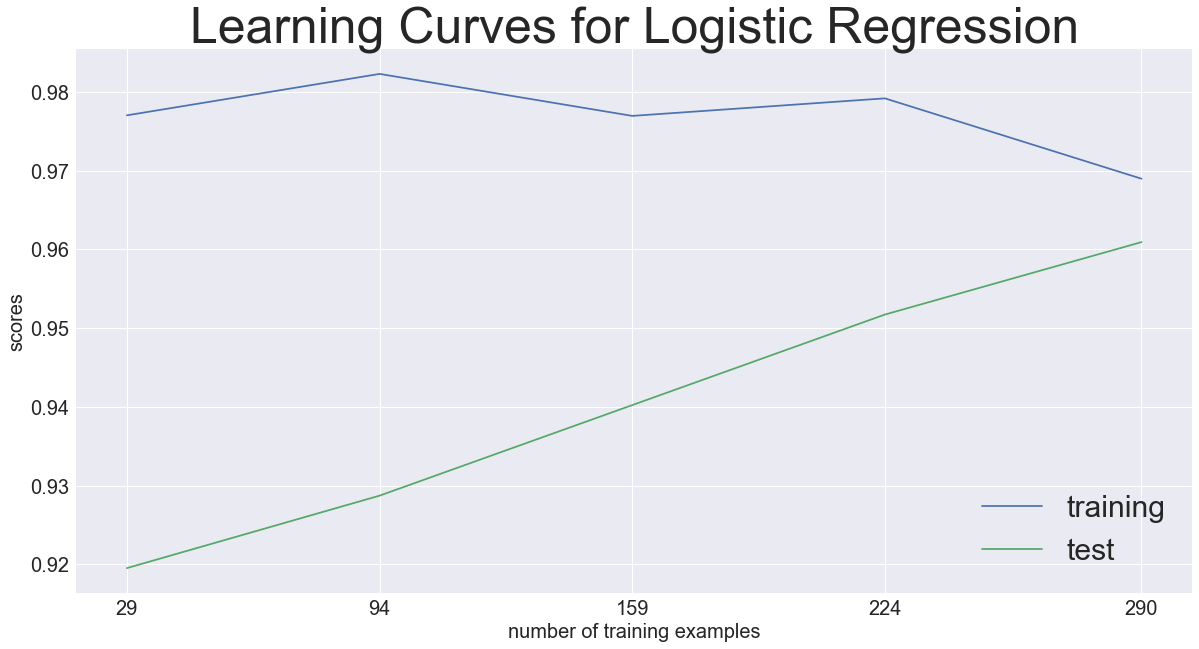

In [18]:
plt.figure(figsize=(20,10))
plt.xlabel("number of training examples", fontsize=20)
plt.ylabel("scores", fontsize=20)
plt.xticks(m,fontsize=20)
plt.yticks(fontsize=20)
plt.title("Learning Curves for Logistic Regression", fontsize=50)
trainingS, = plt.plot(m, train_cv_err, label='training')
testS, = plt.plot(m, test_cv_err, label='test')

plt.legend(handles=[trainingS, testS], fontsize=30);

# ***Challenge 8***

In [19]:
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

md = GaussianNB()
md.fit(X_train, y_train)
print('GaussianNB score: {}'.format(accuracy_score(y_test, md.predict(X_test))))

md = SVC()
md.fit(X_train, y_train)
print('SVC score: {}'.format(accuracy_score(y_test, md.predict(X_test))))

md = DecisionTreeClassifier()
md.fit(X_train, y_train)
print('DecisionTreeClassifier score: {}'.format(accuracy_score(y_test, md.predict(X_test))))

md = RandomForestClassifier()
md.fit(X_train, y_train)
print('RandomForestClassifier score: {}'.format(accuracy_score(y_test, md.predict(X_test))))



GaussianNB score: 0.9389312977099237
SVC score: 0.9541984732824428
DecisionTreeClassifier score: 0.9389312977099237
RandomForestClassifier score: 0.9465648854961832


# ***Challenge 9***

In [20]:
from sklearn.cross_validation import cross_val_score
scores = cross_val_score(LogisticRegression(), X, y)
scoresM = scores.mean()
print('LogisticRegression cross-validated score: {}'.format(scoresM))

scores = cross_val_score(GaussianNB(), X, y)
scoresM = scores.mean()
print('GaussianNB cross-validated score: {}'.format(scoresM))

scores = cross_val_score(SVC(), X, y)
scoresM = scores.mean()
print('SVC cross-validated score: {}'.format(scoresM))

scores = cross_val_score(DecisionTreeClassifier(), X, y)
scoresM = scores.mean()
print('DecisionTreeClassifier cross-validated score: {}'.format(scoresM))

scores = cross_val_score(RandomForestClassifier(), X, y)
scoresM = scores.mean()
print('RandomForestClassifier cross-validated score: {}'.format(scoresM))


LogisticRegression cross-validated score: 0.960919540229885
GaussianNB cross-validated score: 0.9310344827586207
SVC cross-validated score: 0.9540229885057472
DecisionTreeClassifier cross-validated score: 0.9471264367816093
RandomForestClassifier cross-validated score: 0.9563218390804598


# ***Challenge 10***

In [378]:

df3 = pd.DataFrame(columns=df.columns)
df3['party'] = df['party']
for i in range(1,len(df.columns)):   
    votemode = df[df.columns[i]][df[df.columns[i]]!='?'].map({'y':1, 'n':0}).mode()[0]
    df3[df.columns[i]] = df[df.columns[i]].map({'y':1, 'n':0, '?':votemode})
    
y = df3['hi']
X = df3[df3.columns[2:]]
scores = cross_val_score(LogisticRegression(), X, y)
scoresM = scores.mean()
print('LogisticRegression cross-validated score: {}'.format(scoresM))

LogisticRegression cross-validated training score: 0.6756145138998232


# ***Challenge 11***

In [384]:
movies = pd.read_csv('movies.csv').dropna()


In [385]:
movies.head()

,Unnamed: 0,Title,Rating,Genre,Director,Producer,Foreign Gross,Opening Weekend,Widest Release,Budget,Release Date,Domestic Gross,Runtime
0,0,Pirates of the Caribbean: Dead Man's Chest,PG-13,Period Adventure,Gore Verbinski,Jerry Bruckheimer,642863913.0,135634554,4133,225000000.0,2006-07-07,423315812,151
2,2,Cars,G,Animation,John Lasseter,Darla K. Anderson,218133298.0,60119509,3988,120000000.0,2006-06-09,244082982,116
3,3,X-Men: The Last Stand,PG-13,Action / Adventure,Brett Ratner,Avi Arad,224997093.0,102750665,3714,210000000.0,2006-05-26,234362462,104
4,4,The Da Vinci Code,PG-13,Thriller,Ron Howard,Brian Grazer,540703713.0,77073388,3757,125000000.0,2006-05-19,217536138,149
5,5,Superman Returns,PG-13,Action / Adventure,Bryan Singer,Gilbert Adler,191000000.0,52535096,4065,270000000.0,2006-06-28,200081192,154


In [386]:
y = movies['Rating']
X = movies[['Foreign Gross','Opening Weekend', 'Widest Release', 'Budget', 'Domestic Gross', 'Runtime']]
X.head()

,Foreign Gross,Opening Weekend,Widest Release,Budget,Domestic Gross,Runtime
0,642863913.0,135634554,4133,225000000.0,423315812,151
2,218133298.0,60119509,3988,120000000.0,244082982,116
3,224997093.0,102750665,3714,210000000.0,234362462,104
4,540703713.0,77073388,3757,125000000.0,217536138,149
5,191000000.0,52535096,4065,270000000.0,200081192,154


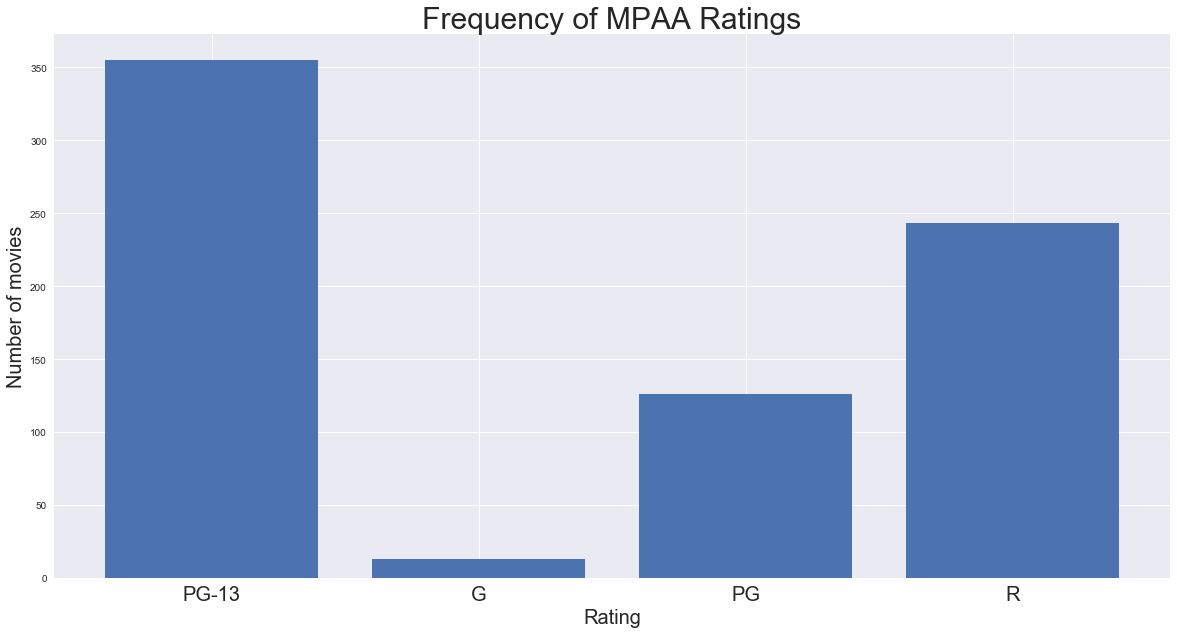

In [406]:
plt.figure(figsize=(20,10))
plt.xlabel('Rating', fontsize=20)
plt.ylabel('Number of movies', fontsize=20)
plt.xticks(range(4), list(movies.Rating.unique()), fontsize=20)
plt.bar(range(4), [y[movies.Rating == rating].count() for rating in list(movies.Rating.unique())] )


plt.title("Frequency of MPAA Ratings", fontsize=30)
plt.show()

In [437]:
# scores = cross_val_score(LogisticRegression(), X, y)
# scoresM = scores.mean()
# print('LogisticRegression cross-validated score: {}'.format(scoresM))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=4444)

lr = LogisticRegression()
lr.fit(X_train, y_train)
score = accuracy_score(y_test, lr.predict(X_test))
print('LogisticRegression score: {}'.format(score))


# scores = cross_val_score(KNeighborsClassifier(n_neighbors=15), X, y)
# scoresM = scores.mean()
# print('KNeighborsClassifier cross-validated score: {}'.format(scoresM))
knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(X_train, y_train)
score = accuracy_score(y_test, knn.predict(X_test))
print('KNeighborsClassifier(n=15) score: {}'.format(score))

def PG13Classifier(X):
    return len(X)*['PG-13']

scoresM = accuracy_score(y, PG13Classifier(X))
print('PG13Classifier score: {}'.format(scoresM))


LogisticRegression score: 0.5135135135135135
KNeighborsClassifier(n=15) score: 0.4954954954954955
PG13Classifier score: 0.4816824966078697


In [436]:
# The coefficients are organized as a list per class and multiply the decision function for each
lr.coef_, lr.classes_

(array([[  1.44433036e-08,  -1.01809608e-07,  -1.17993050e-10,
          -2.01760688e-08,  -2.13100286e-08,  -6.68628421e-12],
        [  6.58379825e-09,  -7.84248430e-08,  -4.58796875e-11,
          -3.84179616e-09,   4.39015459e-09,  -2.98955913e-12],
        [  7.84227485e-10,   3.25631431e-08,  -2.64839539e-11,
           3.02820993e-09,  -1.20064148e-08,  -8.27081834e-13],
        [ -1.88638597e-09,   1.13364330e-08,   4.68168080e-12,
          -1.41885483e-08,  -6.27780988e-10,   4.72486621e-13]]),
 array(['G', 'PG', 'PG-13', 'R'], dtype=object))

# ***Challenge 12***

In [440]:
hab = pd.read_csv('haberman.data.txt')

In [441]:
hab.head()

,age,year,nnodes,survival
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [452]:
print('Average age of patients: {}\nStandard deviation of age: {}'.format(hab.age.mean(), hab.age.std()))
print('\nFive year survival: \n\tAverage age of patients: {}\n\tStandard deviation of age: {}'.format(
    hab[hab.survival == 1].age.mean(), hab[hab.survival == 1].age.std()))
print('\nLess than five year survival: \n\tAverage age of patients: {}\n\tStandard deviation of age: {}'.format(
    hab[hab.survival == 2].age.mean(), hab[hab.survival == 2].age.std()))

Average age of patients: 52.45751633986928
Standard deviation of age: 10.80345234930328

Five year survival: 
	Average age of patients: 52.01777777777778
	Standard deviation of age: 11.012154179929546

Less than five year survival: 
	Average age of patients: 53.67901234567901
	Standard deviation of age: 10.16713720829741


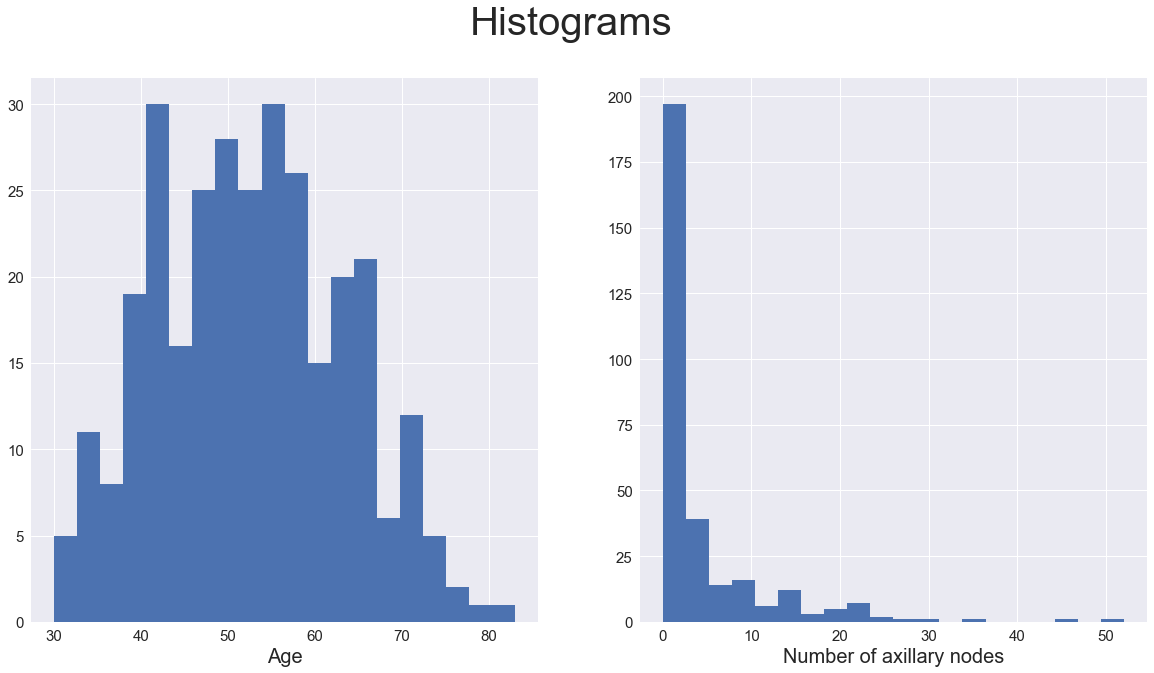

In [495]:
fig, ax = plt.subplots(1, 2, figsize=(20, 10))
fig.suptitle('Histograms', fontsize=40)
ax[1].tick_params(labelsize=15)
ax[1].set_xlabel('Number of axillary nodes', fontsize=20)

ax[1].hist(hab['nnodes'], bins=20)

ax[0].tick_params(labelsize=15)
ax[0].set_xlabel('Age', fontsize=20)
ax[0].hist(hab['age'], bins=20)
plt.show()



In [500]:
print('Earliest year of surgery: 19{}'.format(hab.year.min()))
print('Latest year of surgery: 19{}'.format(hab.year.max()))

Earliest year of surgery: 1958
Latest year of surgery: 1969


In [506]:
y = hab['survival']
X = hab[hab.columns[:3]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=4444)


In [507]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
score = accuracy_score(y_test, lr.predict(X_test))
print('LogisticRegression score: {}'.format(score))

LogisticRegression score: 0.8152173913043478


# *** Challenge Set 8 ***

In [21]:
def recall(TP, FN):
    return TP/(TP+FN)

def precision(TP, FP):
    return TP/(TP+FP)

def specificity(TN, FP):
    return TN/(TN + FP)

def F1(TP, FN, FP):
    p = precision(TP, FP)
    r = recall(TP, FN)
    return 2*p*r/(p+r)

def myacc(TP,TN,FP,FN):
    return (TP+TN)/(TP+TN+FP+FN)

# *** Challenge 1***

In [36]:
X = df3[df.columns[1:]]
y = df3['party']

df3.head()

,party,hi,wp,ad,ph,el,re,an,ai,mx,im,sy,ed,su,cr,du,ex
0,republican,0.00000,1.0,0.0,1.000000,1.000000,1.0,0.0,0.0,0.0,1.0,0.362319,1.000000,1.0,1.0,0.0,1.000000
1,republican,0.00000,1.0,0.0,1.000000,1.000000,1.0,0.0,0.0,0.0,0.0,0.000000,1.000000,1.0,1.0,0.0,0.812689
2,democrat,0.44208,1.0,1.0,0.417453,1.000000,1.0,0.0,0.0,0.0,0.0,1.000000,0.000000,1.0,1.0,0.0,0.000000
3,democrat,0.00000,1.0,1.0,0.000000,0.504762,1.0,0.0,0.0,0.0,0.0,1.000000,0.000000,1.0,0.0,0.0,1.000000
4,democrat,1.00000,1.0,1.0,0.000000,1.000000,1.0,0.0,0.0,0.0,0.0,1.000000,0.423267,1.0,1.0,1.0,1.000000


In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=4444)

In [24]:
def trymodel(modelfn, modelname, X_train, X_test, y_train, y_test):
    model = modelfn()
    model.fit(X_train, y_train)
    pred = model.predict(X_test)

    TP = len(list(pred[(pred == y_test) & (pred == 'democrat')]))
    TN = len(list(pred[(pred == y_test) & (pred == 'republican')]))
    FP = len(list(pred[(pred != y_test) & (pred == 'democrat')]))
    FN = len(list(pred[(pred != y_test) & (pred == 'republican')]))
    print('{} scores:\n\taccuracy:\t{}\n\tprecision:\t{}\n\trecall:\t\t{}\n\tF1:\t\t{}\n\t'.format(
        modelname,
        accuracy_score(y_test, pred),
        precision(TP,FP),
        recall(TP,FN),
        F1(TP,FN,FP)
    ))

In [28]:
trymodel(LogisticRegression, 'LogisticRegression', X_train, X_test, y_train, y_test)
trymodel(GaussianNB, 'GaussianNB', X_train, X_test, y_train, y_test)
trymodel(SVC, 'SVC', X_train, X_test, y_train, y_test)
trymodel(DecisionTreeClassifier, 'DecisionTreeClassifier', X_train, X_test, y_train, y_test)
trymodel(RandomForestClassifier, 'RandomForestClassifier', X_train, X_test, y_train, y_test)

LogisticRegression scores:
	accuracy:	0.9389312977099237
	precision:	0.9259259259259259
	recall:		0.974025974025974
	F1:		0.949367088607595
	
GaussianNB scores:
	accuracy:	0.9389312977099237
	precision:	0.9156626506024096
	recall:		0.987012987012987
	F1:		0.95
	
SVC scores:
	accuracy:	0.9541984732824428
	precision:	0.9493670886075949
	recall:		0.974025974025974
	F1:		0.9615384615384615
	
DecisionTreeClassifier scores:
	accuracy:	0.9465648854961832
	precision:	0.9375
	recall:		0.974025974025974
	F1:		0.9554140127388535
	
RandomForestClassifier scores:
	accuracy:	0.9618320610687023
	precision:	0.95
	recall:		0.987012987012987
	F1:		0.9681528662420381
	


# *** Challenge 2***

In [29]:
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.preprocessing import label_binarize



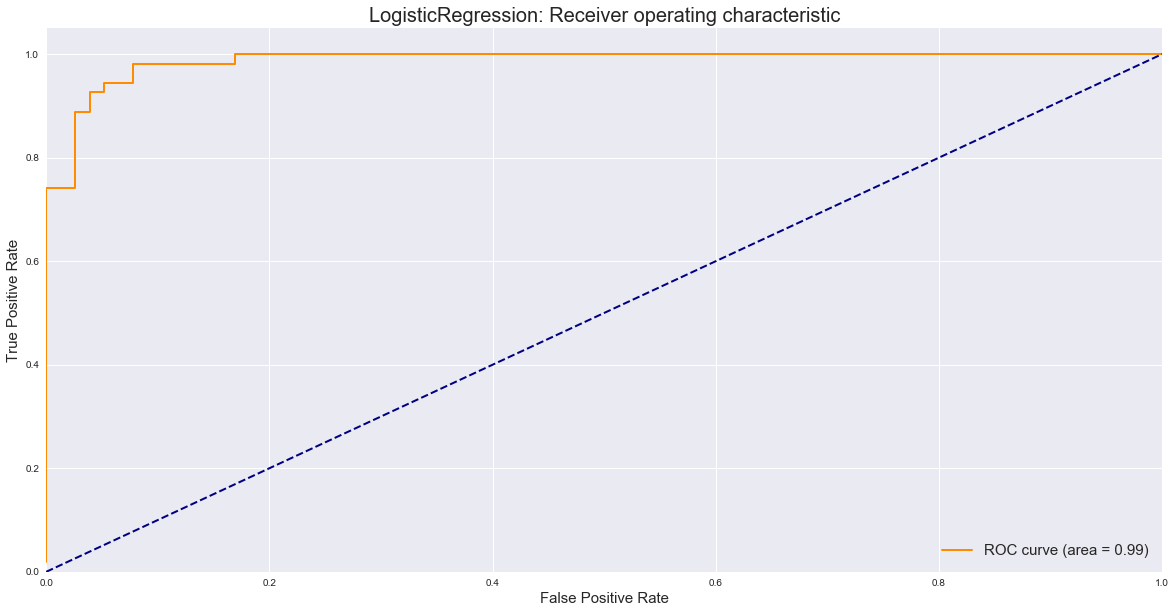

In [88]:
X = df3[df.columns[1:]]
y = df3['party']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=4444)

yB = label_binarize(y, classes=['democrat', 'republican'])
y_testB = label_binarize(y_test, classes=['democrat', 'republican'])

def displayROC_AUC(model, modelname, X_train, X_test, y_train, y_testB):
    classifier = model()
    if model == LogisticRegression or model == SVC:
        y_score = classifier.fit(X_train, y_train).decision_function(X_test)
    else:
        y_score = 1 - classifier.fit(X_train, y_train).predict_proba(X_test)[:,0]

    # Compute ROC curve and ROC area
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    fpr, tpr, _ = roc_curve(y_testB, y_score)
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(20,10))
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',
             lw=lw, 
             label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate', fontsize=15)
    plt.ylabel('True Positive Rate', fontsize=15)
    plt.title(modelname+': Receiver operating characteristic', fontsize=20)
    plt.legend(fontsize=15)
    plt.show()

displayROC_AUC(LogisticRegression, 'LogisticRegression', X_train, X_test, y_train, y_testB)



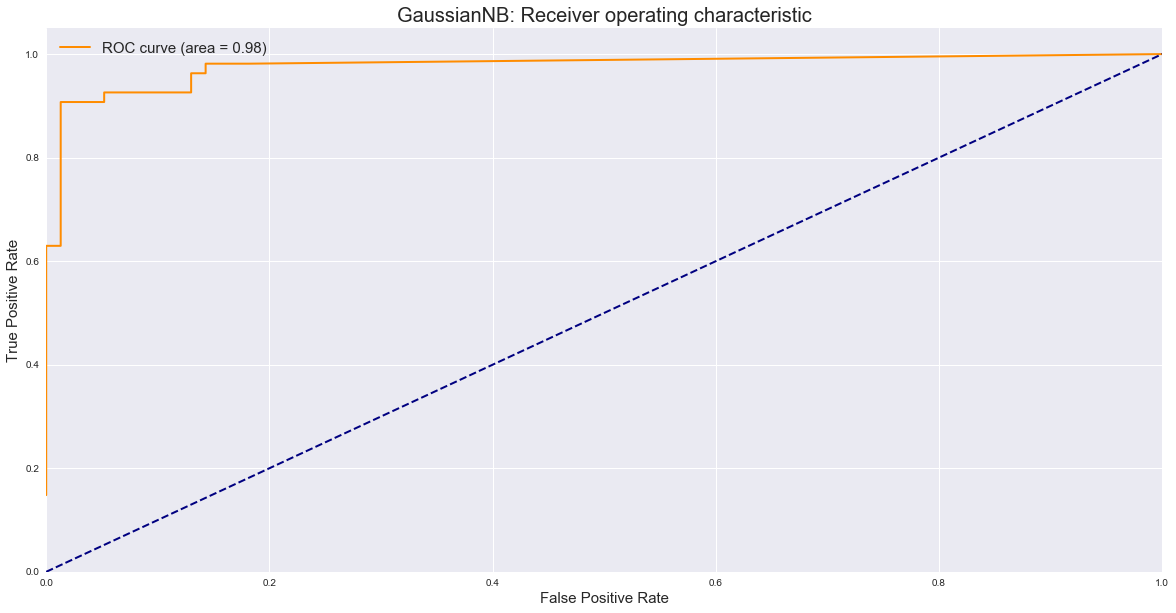

In [80]:
displayROC_AUC(GaussianNB, 'GaussianNB', X_train, X_test, y_train, y_testB)


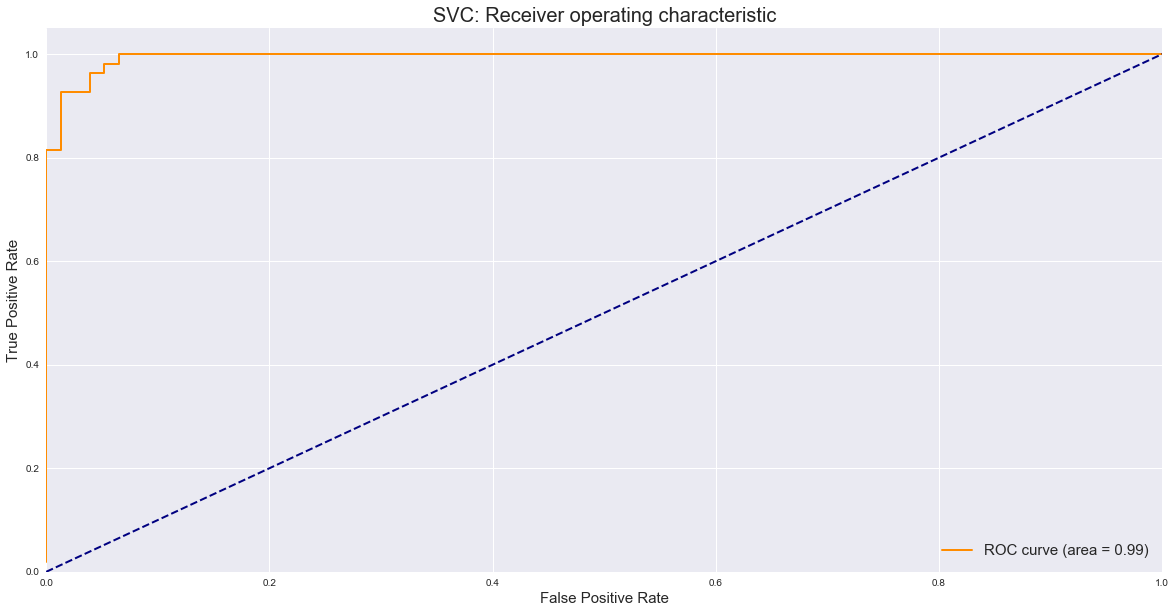

In [81]:
displayROC_AUC(SVC, 'SVC', X_train, X_test, y_train, y_testB)

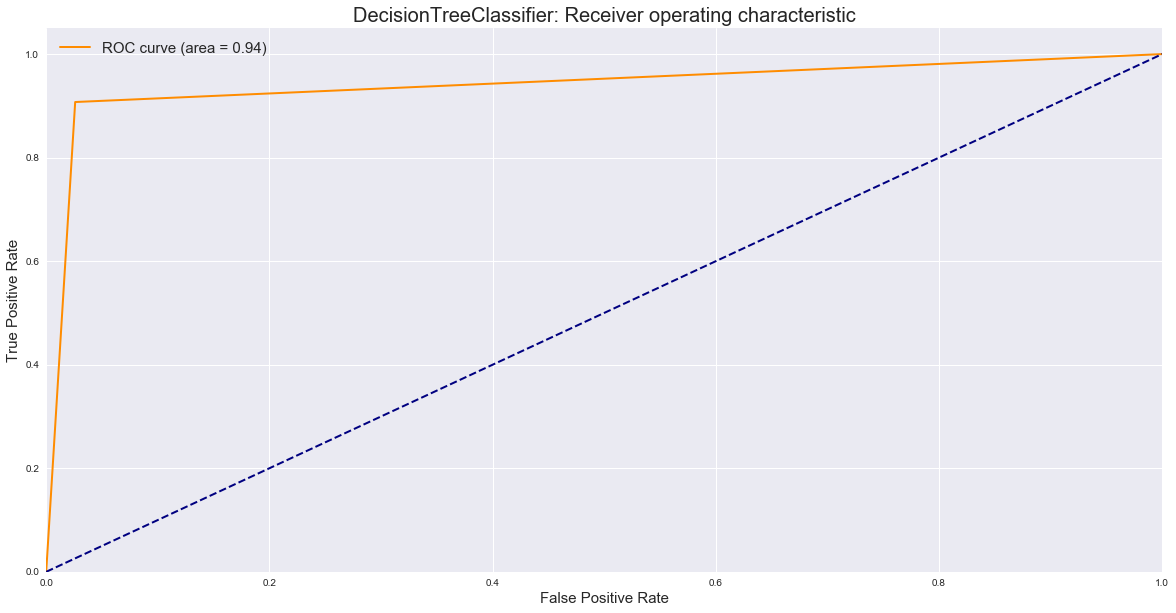

In [91]:
displayROC_AUC(DecisionTreeClassifier, 'DecisionTreeClassifier', X_train, X_test, y_train, y_testB)

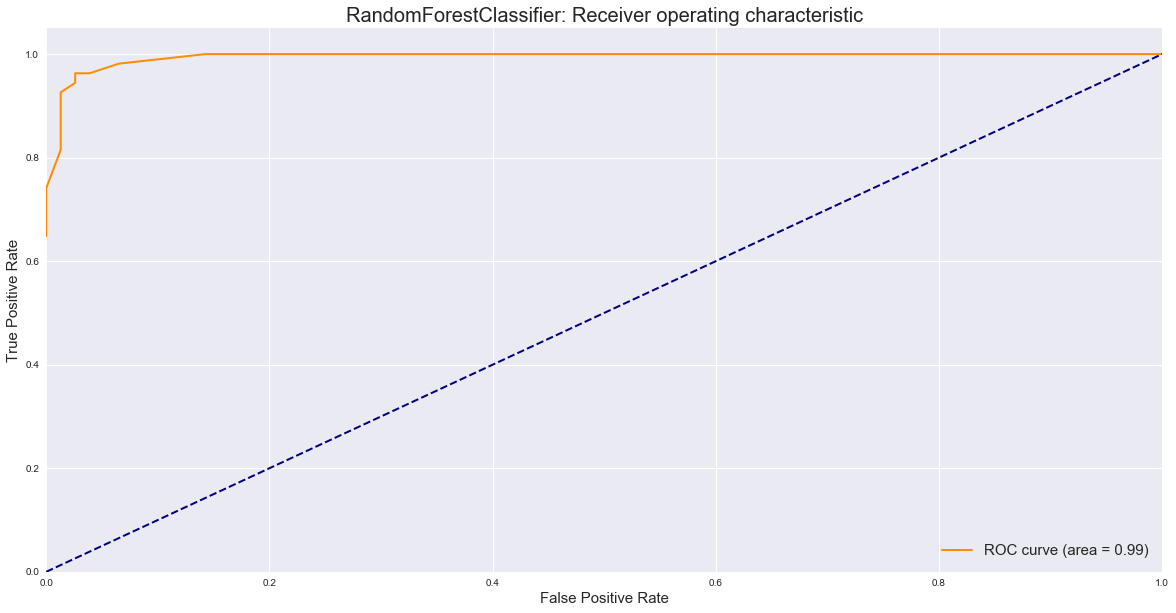

In [66]:
displayROC_AUC(RandomForestClassifier, 'RandomForestClassifier', X_train, X_test, y_train, y_testB)

# *** Challenge 3***

In [665]:
def trymodel2(modelfn, modelname, X, yB):

    print('{} scores:\n\taccuracy:\t{}\n\tprecision:\t{}\n\trecall:\t\t{}\n\tF1:\t\t{}\n\t'.format(
        modelname,
        cross_val_score(modelfn(), X, yB[:,0], scoring='accuracy').mean(),
        cross_val_score(modelfn(), X, yB[:,0], scoring='precision').mean(),
        cross_val_score(modelfn(), X, yB[:,0], scoring='recall').mean(),
        cross_val_score(modelfn(), X, yB[:,0], scoring='f1').mean(),
    ))

trymodel2(LogisticRegression, 'LogisticRegression', X, yB)
trymodel2(GaussianNB, 'GaussianNB', X, yB)
trymodel2(SVC, 'SVC', X, yB)
trymodel2(DecisionTreeClassifier, 'DecisionTreeClassifier', X, yB)

LogisticRegression scores:
	accuracy:	0.960919540229885
	precision:	0.9493987196430748
	recall:		0.9523809523809524
	F1:		0.9500594454722894
	
GaussianNB scores:
	accuracy:	0.9310344827586207
	precision:	0.9086132472230545
	recall:		0.9166666666666666
	F1:		0.9111848145910462
	
SVC scores:
	accuracy:	0.9540229885057472
	precision:	0.922270955165692
	recall:		0.9642857142857143
	F1:		0.9421835105723705
	
DecisionTreeClassifier scores:
	accuracy:	0.9540229885057472
	precision:	0.9246603970741902
	recall:		0.9523809523809522
	F1:		0.9359594977286131
	


# *** Challenge 4***

In [74]:
movies = pd.read_csv('movies.csv').dropna()

y = movies['Rating']
X = movies[['Foreign Gross','Opening Weekend', 'Widest Release', 'Budget', 'Domestic Gross', 'Runtime']]
yB = label_binarize(y, classes=movies.Rating.unique())


print('LogisticRegression scores:\n\tprecision:\t{}\n\trecall:\t\t{}'.format(
    cross_val_score(LogisticRegression(), X, yB[:,0], scoring='precision').mean(),
    cross_val_score(LogisticRegression(), X, yB[:,0], scoring='recall').mean(),
))

print('KNeighborsClassifier(n=15) scores:\n\tprecision:\t{}\n\trecall:\t\t{}'.format(
    cross_val_score(KNeighborsClassifier(n_neighbors=15), X, yB[:,0], scoring='precision').mean(),
    cross_val_score(KNeighborsClassifier(n_neighbors=15), X, yB[:,0], scoring='recall').mean(),
))

LogisticRegression scores:
	precision:	0.5031520598530909
	recall:		0.7159236575986326
KNeighborsClassifier(n=15) scores:
	precision:	0.5480335267569311
	recall:		0.4846413141527797


# *** Challenge 5***

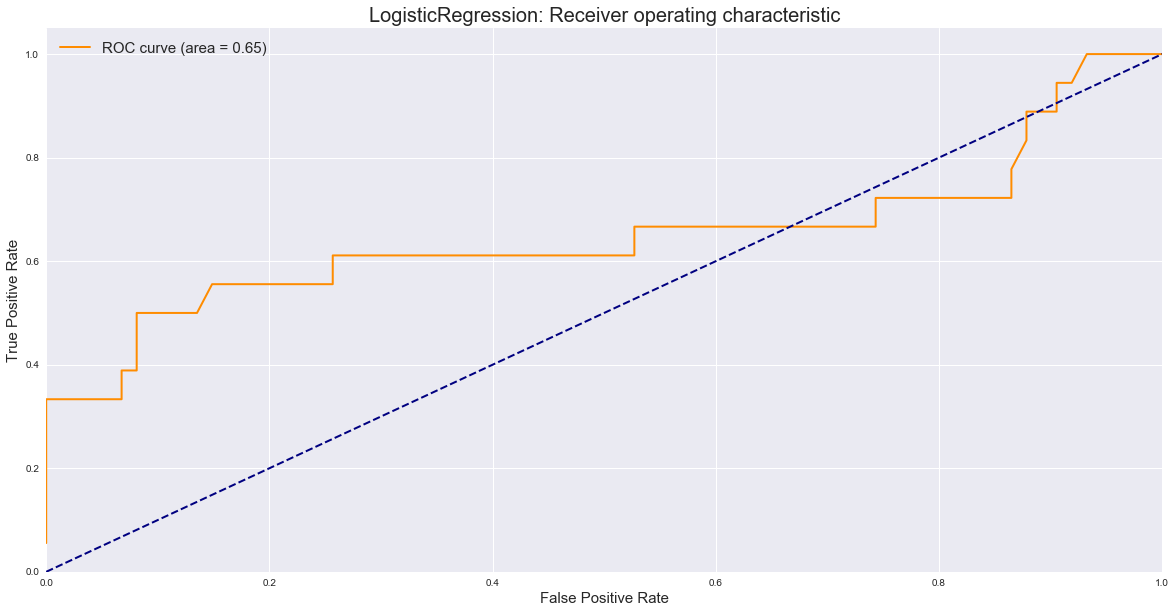

In [76]:
hab = pd.read_csv('haberman.data.txt')
y = hab['survival']
X = hab[hab.columns[:3]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=4444)
y_testB = label_binarize(y_test, classes=hab.survival.unique())

displayROC_AUC(LogisticRegression, 'LogisticRegression', X_train, X_test, y_train, y_testB[:,0])
